In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests



In [5]:
# !pip install wordcloud    # install wordcloud module first
from wordcloud import WordCloud

In [6]:
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

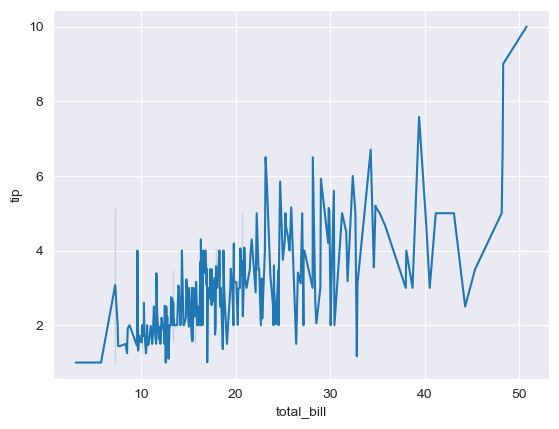

In [9]:
sns.set_style('darkgrid')  # other choice: whitegrid 

sns.lineplot(data = tips,
             x = 'total_bill',
             y = 'tip')

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

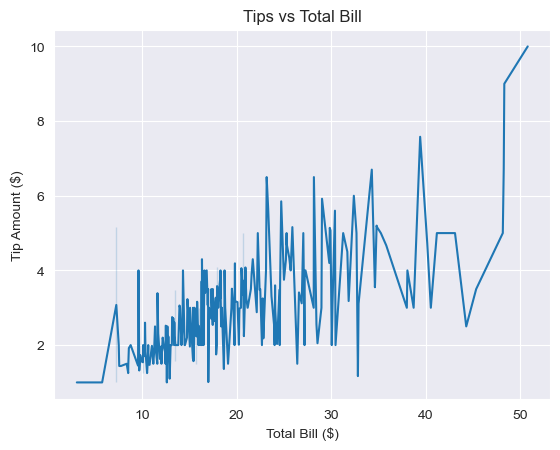

In [10]:
tipgraph = sns.lineplot( data = tips,
                        x = 'total_bill',
                        y = 'tip')

tipgraph.set(title = 'Tips vs Total Bill',
             xlabel = 'Total Bill ($)',
             ylabel = 'Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount($)')]

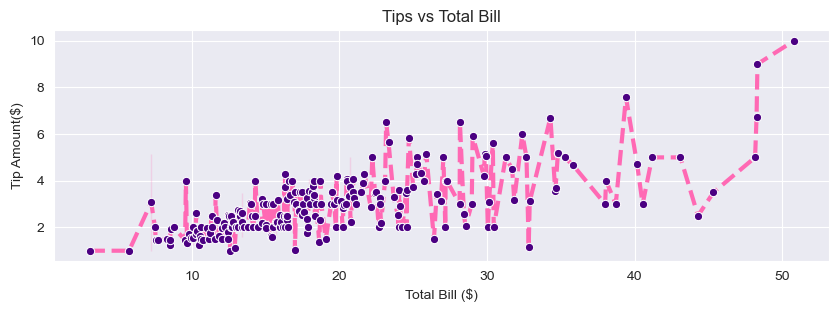

In [11]:
fig = plt.subplots(figsize = (10, 3))

tipgraph = sns.lineplot(data = tips,
                        x = 'total_bill',
                        y = 'tip',
                        color = 'hotpink',
                        linestyle = '--',
                        linewidth = 3,
                        marker = 'o',
                        markerfacecolor = 'indigo')

tipgraph.set(title = 'Tips vs Total Bill',
             xlabel = 'Total Bill ($)',
             ylabel = 'Tip Amount($)')

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tips ($)')]

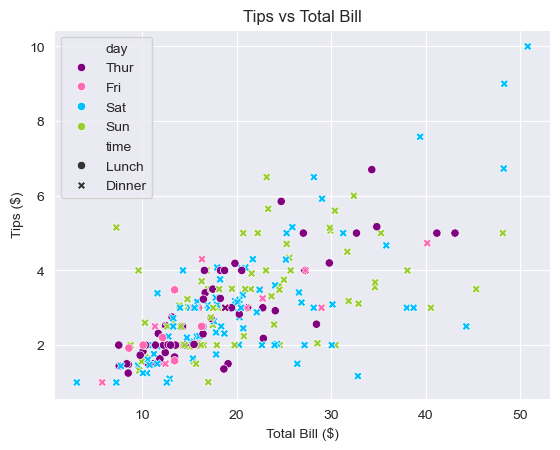

In [12]:
tipgraph = sns.scatterplot(data = tips,
                           x = 'total_bill',
                           y = 'tip',
                           style = 'time',
                           hue = 'day',
                           palette = ['purple', 'hotpink', 'deepskyblue', 'yellowgreen'])

tipgraph.set(title = 'Tips vs Total Bill',
             xlabel = 'Total Bill ($)',
             ylabel = 'Tips ($)')

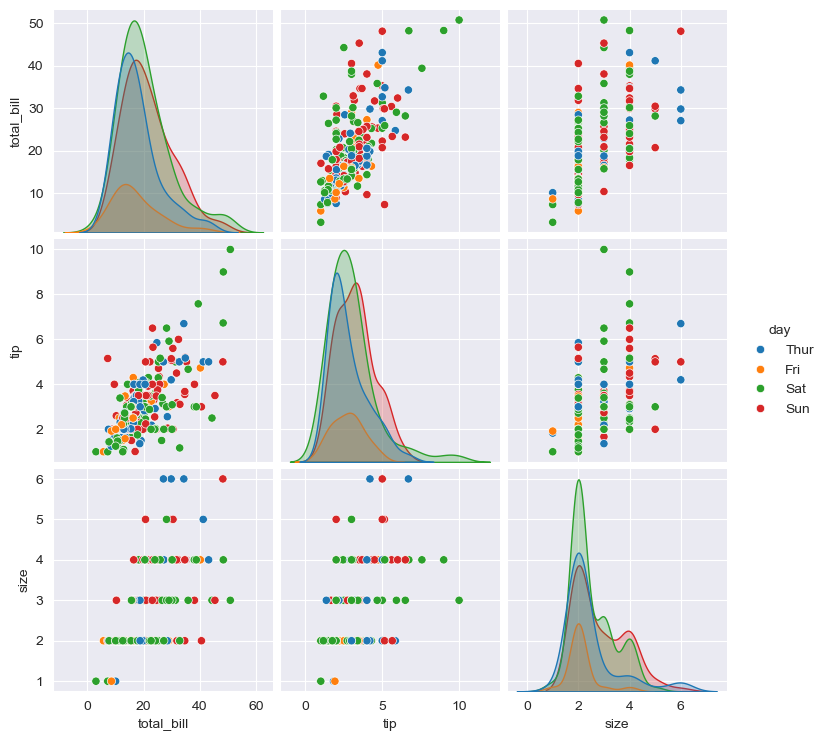

In [13]:
sns.pairplot(data = tips,
             hue = 'day')

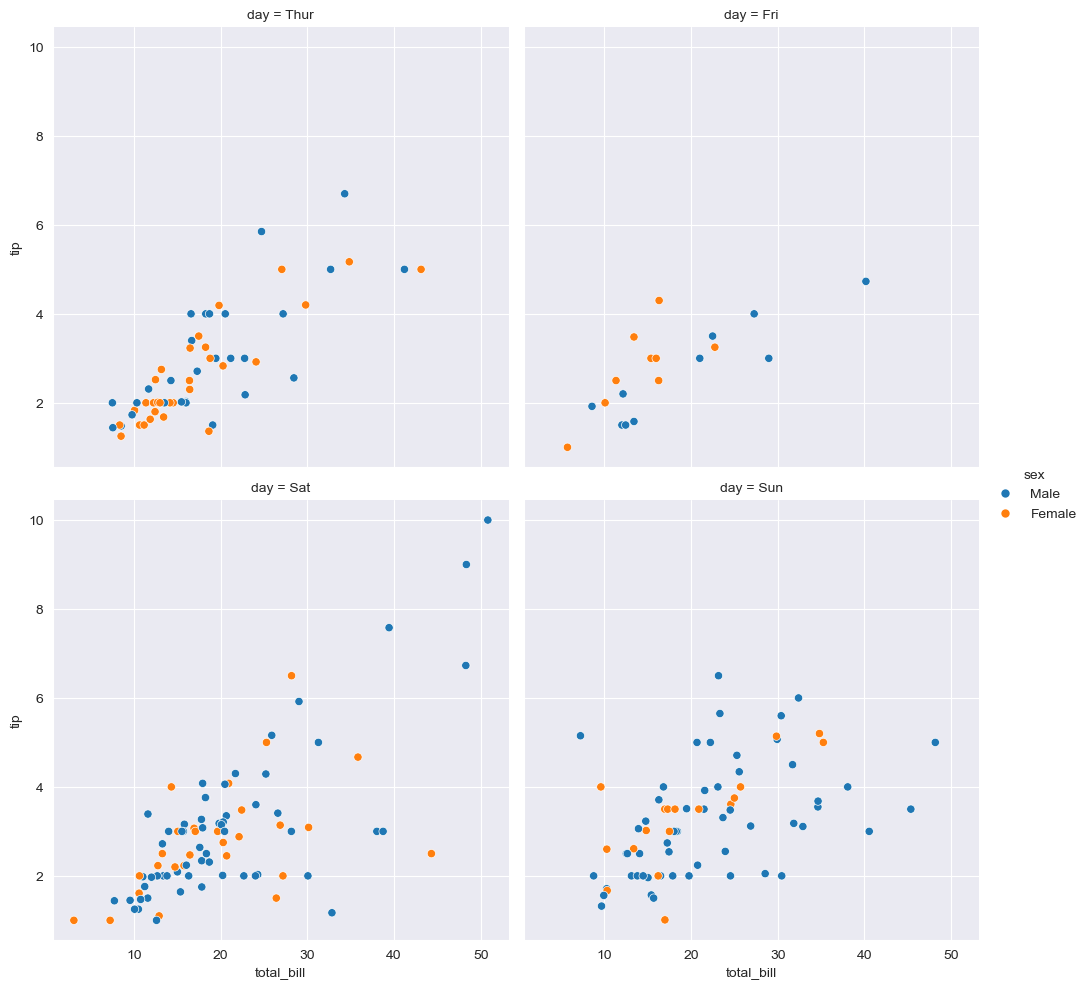

In [19]:
sns.relplot(data = tips,
            x = 'total_bill',
            y = 'tip',
            hue = 'sex',
            col = 'day',
            kind = 'scatter',
            col_wrap = 2)

In [20]:
import plotly.graph_objects as go

x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

In [21]:
graph = go.Figure()
graph.add_trace(go.Bar(x = x1, y =  y1))

graph.update_layout(
        title = "Pirate Scores",
        xaxis_title = "Pirates",
        yaxis_title = "Score"
)

In [22]:
graph = go.Figure()

graph.add_trace(go.Scatter(
    x = x1,
    y = y1,
    mode = 'markers',
    marker = dict(
        size = 15,
        color = 'hotpink',
        opacity = 1,
        line = dict(width = 5, color = 'purple')
    )
))

graph.update_layout(
    title = 'Interactive Pirate Plot',
    xaxis_title = 'Pirates',
    yaxis_title = 'Scores',
    width = 500,
    height = 500
)

In [24]:
from wordcloud import WordCloud
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
                 on_bad_lines = 'skip')
df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


(-0.5, 399.5, 199.5, -0.5)

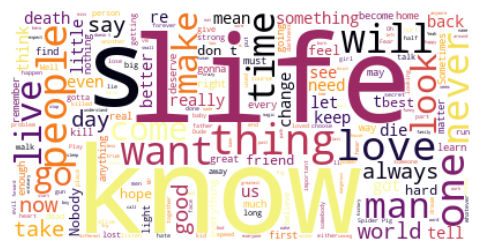

In [28]:
text = " ".join(each for each in df.quote)  # join all the quote values together

wordcloud = WordCloud(background_color = 'white',
                      colormap = 'inferno').generate(text)

fig, ax = plt.subplots(figsize = (7,3))
ax.imshow(wordcloud,
          interpolation = 'bilinear')
ax.axis('off')


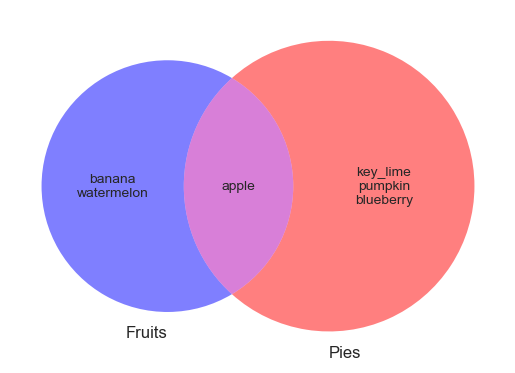

In [32]:
#!pip install matplotlib-venn        # why is the package name different here and line below? Noted, not sure why. In the docs should specify how to install.
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key_lime"])

diagram = venn2([A, B],
                set_labels = ("Fruits", "Pies"),
                set_colors = ("blue", "red"),
                alpha = 0.5
                )

diagram.get_label_by_id("10").set_text("\n".join(A-B))  # use a newline for each item in the list
diagram.get_label_by_id("11").set_text("\n".join(A & B))
diagram.get_label_by_id("01").set_text("\n".join(B - A))